## Labb 1

Jag har använt mig av, google, w3 schools, chat GPT och klasskamrater för att lösa dessa problem

In [ ]:
# Funktion som rensar data från pichu- och pikachufiler
import numpy as np

def cleaned_files(file_path, label):
    clean_files = []
    with open(file_path, "r") as file:
        for line in file:
            # Hoppar över raden om den innehåller width eller height
            if "width (cm)" in line or "height (cm)" in line:
                continue
            # Tar bort parenteser och delar upp raden vid kommatecken för att separera decimaltalen
            rows = line.strip().strip("()").split(",")

            # Konverterar decimaltalen till flyttal och avrundar dem till två decimaler.
            x = round(float(rows[0]), 2)
            y = round(float(rows[1]), 2)
            # Lägger till om det är pichu eller pikachu.
            clean_files.append([x, y, label])
    return clean_files

# Sätter etiketter för Pichu och Pikachu baserat på filnamn
pichu_label = 0
pikachu_label = 1

# Använder funktionen för att rensa filerna och lägger till etiketterna från ovan
Pichu_data = cleaned_files("../data/pichu.txt", pichu_label)
Pikachu_data = cleaned_files("../data/pikachu.txt", pikachu_label)

Pichu_data
Pikachu_data

In [107]:
import pandas as pd

p1 = pd.DataFrame(Pichu_data)
p2 = pd.DataFrame(Pikachu_data)

#Lägger samman Pichu data och Pikachu data till en variabel med samlad data
pokemon_data = pd.concat([p1, p2])

In [ ]:
#Lägger ihop listorna till en enda lista och 2D array
pokemon_data = np.array(pokemon_data)
pokemon_data

In [109]:
#np.array(pokemon_data).shape

In [110]:
# Funktion för att "exportera" ut rensad data i nya filer
def output_cleaned_file(file_path, data):
    with open(file_path, "w") as file:
        for i, row in enumerate(data):
            x, y, type = row
            file.write(f"({x:.2f}, {y:.2f}, '{type}')\n")

output_cleaned_file("../data/pichu_cleanedup.txt", Pichu_data)
output_cleaned_file("../data/pikachu_cleanedup.txt", Pikachu_data)

In [111]:
# Här finns filen att hämta
test_points_path = "../data/test_points.txt"

# Hit ska den skrivas ut
TP_output_path = "../data/TP_cleanedup.txt"
rounded_TP = []

# Läser från och skriver till dessa ställen.
with open(test_points_path, "r") as TP_file, open(TP_output_path, 'w') as TP_output_file:
    for line in TP_file:
        # Tar bort alla mellanslag
        cleaned_TP = line.replace(' ', '')
        # Delar upp strängen i en lista
        points_list = cleaned_TP.split('),(')

        for point_str in points_list:
            
            # Ta bort parenteser och splitta vid kommatecken
            x, y = map(float, point_str.strip('()').split(','))
            # map() är en inbyggd Python-funktion som används för att tillämpa en given funktion på varje element i en sekvens 
            # (till exempel en lista eller en tuple) och returnera en ny sekvens av resultaten.
        
            # Lägger till punkterna i den avrundade listan som en tupel istället för en formaterad sträng
            rounded_TP.append((x, y))

        # Skriver varje punkt i rounded_TP till filen
        for point in rounded_TP:
            TP_output_file.write(f"({point[0]}, {point[1]})\n")

        TP_cleaned = np.array(rounded_TP)

    # Skrier ut så vi ser hur det ser ut.
    print(rounded_TP) # Lista med tupels
    print(TP_cleaned) # 2D array

[(25.0, 35.0), (15.0, 14.0), (26.0, 30.0), (22.0, 45.0)]
[[25. 35.]
 [15. 14.]
 [26. 30.]
 [22. 45.]]


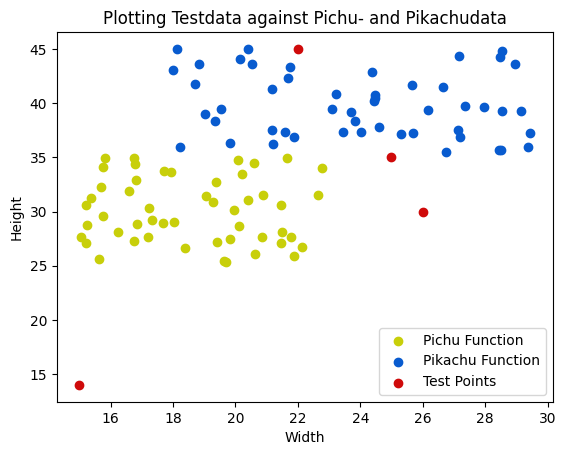

In [112]:
import matplotlib.pyplot as plt

# Funktion för att läsa in x, y och label från filerna
def read_data(file_path):
    x_values = []
    y_values = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
           
           #Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemon typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    return x_values, y_values, labels

# Funktion för scatter
def plot_scatter(x, y, label, color):
    plt.scatter(x, y, label=label, color=color)

def main():

    # Läser in data för Pichu, Pikachu och Test point filerna
    pichu_x, pichu_y, pichu_labels = read_data("../data/pichu_cleanedup.txt")
    pikachu_x, pikachu_y, pikachu_labels = read_data("../data/pikachu_cleanedup.txt")
    TP_format_x, TP_format_y, TP_labels = read_data("../data/TP_cleanedup.txt")
    
    # Plottar punkt-funktionerna och sätter label(legend namnen) och vilken färg punkterna ska ha.
    plt.scatter(pichu_x, pichu_y, label="Pichu Function", color= '#c8cf0a')
    plt.scatter(pikachu_x, pikachu_y, label="Pikachu Function", color= '#085bcf')
    plt.scatter(TP_format_x, TP_format_y, label="Test Points", color='#cf0a0a')

    # Sätter titel och etiketter för respektive axel och graftitel
    plt.title("Plotting Testdata against Pichu- and Pikachudata")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Använder labeln som finns i scatter så behöver inte fyllas i mer.
    plt.legend()
    
    # Visa grafen
    plt.show()

main()

C:\Users\Sandra\AppData\Local\Temp\ipykernel_28472\650671181.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, label=label, c=color)


Testpunkt 1: Närmast Pichu-punkt är på avstånd 2.44. Närmast Pikachu-punkt är på avstånd 1.83.
Sample with (width, height): (25.0, 35.0) classified as Pikachu

Testpunkt 2: Närmast Pichu-punkt är på avstånd 11.66. Närmast Pikachu-punkt är på avstånd 22.21.
Sample with (width, height): (15.0, 14.0) classified as Pichu

Testpunkt 3: Närmast Pichu-punkt är på avstånd 3.68. Närmast Pikachu-punkt är på avstånd 5.56.
Sample with (width, height): (26.0, 30.0) classified as Pichu

Testpunkt 4: Närmast Pichu-punkt är på avstånd 10.03. Närmast Pikachu-punkt är på avstånd 1.59.
Sample with (width, height): (22.0, 45.0) classified as Pikachu



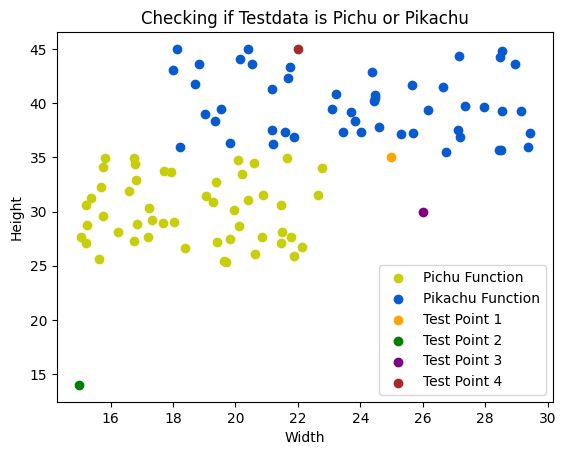

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Funktion för att läsa in x, y och label från filerna
def read_data(pokemon_clean):
    x_values = []
    y_values = []
    labels = []

    with open(pokemon_clean, 'r') as pokemon_cleaned:
        for line in pokemon_cleaned:
           
           #Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemón typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    # Används för att skapa tuples med dessa tre variabler. 
    #Dessa variabler används sedan för att hämta x-värden, y-värden och etiketter för Pichu, Pikachu och testpunkter i resten av koden.
    return np.array(x_values), np.array(y_values), labels

# Funktion för scatter
def plot_scatter(x, y, label, color=None):
    # color=None: Valfri parameter som specificerar färgen på punkterna. 
    # Om ingen färg anges (dvs. color är None), kommer scatter-plotten att använda standardfärg. Annars används den specificerade färgen.
    if color is not None:
        plt.scatter(x, y, label=label, c=color)
    else:
        plt.scatter(x, y, label=label)

def distances_and_type(TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y):
    # CHAT GPT förklaring: pichu_distances: Detta beräknar avståndet mellan varje testpunkt och varje Pichu-punkt genom att använda formeln för 
    # avståndet mellan två punkter i en 2d rymd (np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)). 
    # Skapar en matris av avstånd där varje rad representerar avståndet mellan en testpunkt och varje Pichu-punkt. Sen samma med Pikachu.
    # Ursprungligen är TP_format_x en 1d array som innehåller x-koordinaterna för testpunkterna men här gör den om till 2d. 
    # Genom att lägga till en ny axel får vi en 2d array där varje rad representerar en testpunkt.
    # Detta är skillnaden i x-koordinat mellan varje testpunkt och varje pichupunkt. 
    # Resultatet är en 2d array där varje element representerar skillnaden i x-koordinat mellan en testpunkt och en pichupunkt.
    # Detta är kvadraten av avståndet i x plus kvadraten av avståndet i y för varje testpunkt-pichupunkt-par. Det ger oss kvadraten av det euklidiska avståndet för varje par.
    # Slutligen, detta tar roten ur det som beräknats ovan, vilket ger det faktiska euklidiska avståndet mellan varje testpunkt och varje pichupunkt.
    pichu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)
    pikachu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pikachu_x)**2 + (TP_format_y[:, np.newaxis] - pikachu_y)**2)

    # closest_pichu_indices och closest_pikachu_indices: Dessa använder np.argmin för att hitta index för närmaste Pichu- och Pikachu-punkter för varje testpunkt.
    closest_pichu_indices = np.argmin(pichu_distances, axis=1)
    closest_pikachu_indices = np.argmin(pikachu_distances, axis=1)

    # closest_pichu_distances och closest_pikachu_distances: 
    # Dessa använder indexen från föregående steg för att hämta avstånden till närmaste Pichu- och Pikachu-punkter för varje testpunkt.
    closest_pichu_distances = pichu_distances[np.arange(len(TP_format_x)), closest_pichu_indices]
    closest_pikachu_distances = pikachu_distances[np.arange(len(TP_format_x)), closest_pikachu_indices]

    # classifications: Detta använder np.where för att jämföra avstånden och klassificera 
    # varje testpunkt som antingen "Pichu" eller "Pikachu" beroende på vilket avstånd som är lägre.
    classifications = np.where(closest_pichu_distances < closest_pikachu_distances, "Pichu", "Pikachu")

    #Funktionen returnerar de närmaste avstånden till Pichu och Pikachu samt klassificeringarna för varje testpunkt.
    return closest_pichu_distances, closest_pikachu_distances, classifications

def main():

    # Läser in data för Pichu, Pikachu och Test point filerna
    pichu_data = read_data("../data/pichu_cleanedup.txt")
    pikachu_data = read_data("../data/pikachu_cleanedup.txt")
    TP_data = read_data("../data/TP_cleanedup.txt")
    
    pichu_x, pichu_y, _ = pichu_data
    pikachu_x, pikachu_y, _ = pikachu_data
    TP_format_x, TP_format_y, _ = TP_data

    # Användning:
    # Detta är funktionen som definieras tidigare. 
    # Den tar in sex parametrar: TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, och pikachu_y.
    closest_pichu_distances, closest_pikachu_distances, classifications = distances_and_type(
        TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y)
    # closest_pichu_distances: Detta är en array som kommer att innehålla avstånden från varje testpunkt till den närmaste Pichu-punkten. Samma för Pikachu
    
    # Plottar punkt-funktionerna och sätter label(legend namnen) och vilken färg punkterna ska ha.
    plot_scatter(pichu_x, pichu_y, label="Pichu Function", color='#c8cf0a')
    plot_scatter(pikachu_x, pikachu_y, label="Pikachu Function", color='#085bcf')

    # Använder en anpassad färgskala för testpunkterna
    colors = ['orange', 'green', 'purple', 'brown', 'hotpink']
    # Skapar en anpassad färgmappning (colormap) för testpunkterna
    cmap = ListedColormap(colors)
    for i, (x, y, label) in enumerate(zip(TP_format_x, TP_format_y, classifications)):
        plot_scatter(x, y, label=f"Test Point {i+1}", color=cmap(i))
       
# OBS Två olika varianter av utskrifter
    # Skriver ut resultaten
    for i in range(len(TP_format_x)):
        print(f"Testpunkt {i+1}: Närmast Pichu-punkt är på avstånd {closest_pichu_distances[i]:.2f}. Närmast Pikachu-punkt är på avstånd {closest_pikachu_distances[i]:.2f}.")

        # Avgör vilken punkt som är närmast för testpunkt i
        if closest_pichu_distances[i] < closest_pikachu_distances[i]:
            closest_pokemon = "Pichu"
        else:
            closest_pokemon = "Pikachu"

        # Skriver ut meddelandet
        print(f"Sample with (width, height): ({TP_format_x[i]}, {TP_format_y[i]}) classified as {closest_pokemon}")
        print()

    # Sätter titel och etiketter för respektive axel och graftitel
    plt.title("Checking if Testdata is Pichu or Pikachu")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Använder labeln som finns i scatter så behöver inte fylla i mer.
    plt.legend()
    
    # Visa grafen
    plt.show()

main()

pichu_classification = 1.0
pikachu_classification = 1.0


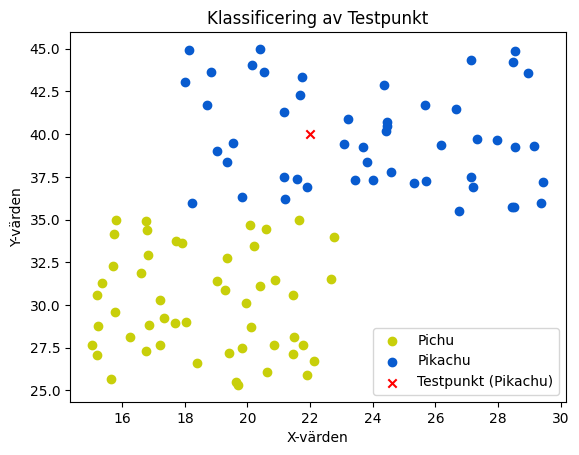

In [130]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

def read_data(pokemon_clean):
    x_values = []
    y_values = []
    labels = []

    label_to_code = {}  # En dictionary för att kartlägga etiketter till numeriska koder
    code_counter = 1  # En räknare för att tilldela unika koder till varje etikett

    with open(pokemon_clean, 'r') as pokemon_cleaned:
        for line in pokemon_cleaned:
            # Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemon typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    
                    # Kolla om etiketten redan har en tilldelad kod, annars tilldela en ny kod
                    if label not in label_to_code:
                        label_to_code[label] = code_counter
                        code_counter += 1

                    labels.append(label_to_code[label])

    # Används för att skapa tuples med dessa tre variabler.
    # Dessa variabler används sedan för att hämta x-värden, y-värden och etiketter för Pichu, Pikachu och testpunkter i resten av koden.
    return np.array(x_values), np.array(y_values), np.array(labels)

def classify_sample(user_test_point, pokemon_data_x, pokemon_data_y, pokemon_data_labels):
    # Skapar en array med koordinaterna för träningsdatan och skapar en 2D array
    training_data_points = np.column_stack((pokemon_data_x, pokemon_data_y, pokemon_data_labels))

    # Skapar en array med koordinaterna för testpunkten
    test_point_array = np.array([user_test_point[0], user_test_point[1]])

    # cdist beräknar avståndet mellan testpunkten och all träningsdata
    distances = distance.cdist(test_point_array.reshape(1, -1), training_data_points[:, :2])

    # Sorterar avstånden och väljer fem närmaste punkterna
    closest_indices = np.argsort(distances)[0][:5]

    # Hämtar etiketterna för de närmsta punkterna
    closest_labels = training_data_points[closest_indices, 2]

    # Avgör majoritetsklassen baserat på fem närmsta punkterna
    unique_labels, counts = np.unique(closest_labels, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]

    return majority_label

# Låt användaren mata in en testpunkt
while True:
    try:
        x = float(input("Ange x-koordinat för testpunkten: "))
        y = float(input("Ange y-koordinat för testpunkten: "))
        user_test_point = (x, y)
        break
    except ValueError:
        print("Felaktig inmatning. Ange giltiga numeriska värden.")

pichu_array = np.array(pokemon_data)
pichu_x = pichu_array[:, 0]
pichu_y = pichu_array[:, 1]
pichu_label = pichu_array[:, 2]
pikachu_array = np.array(pokemon_data)
pikachu_x = pikachu_array[:,0]
pikachu_y = pikachu_array[:,1]
pikachu_label = pikachu_array[:,2]

# Klassificera testpunkten
pichu_classification = classify_sample(user_test_point, pichu_x, pichu_y, pichu_label)
pikachu_classification = classify_sample(user_test_point, pikachu_x, pikachu_y, pikachu_label)

print(f"{pichu_classification = }")
print(f"{pikachu_classification = }")

# Plotta Pichu och Pikachu punkterna
plt.scatter(pichu_x[pichu_label == 0], pichu_y[pichu_label == 0], label="Pichu", color='#c8cf0a')
plt.scatter(pichu_x[pichu_label == 1], pichu_y[pichu_label == 1], label="Pikachu", color='#085bcf')


# Plotta testpunkten med en annan färg beroende på klassificeringen
if pichu_classification == 0:
    plt.scatter(x, y, label="Testpunkt (Pichu)", color='g', marker='x')
elif pikachu_classification == 1:
    plt.scatter(x, y, label="Testpunkt (Pikachu)", color='r', marker='x')
else:
    plt.scatter(x, y, label="Testpunkt (Oklar)", color='purple', marker='x')


# Sätta titel och etiketter för axlarna
plt.title("Klassificering av Testpunkt")
plt.xlabel("X-värden")
plt.ylabel("Y-värden")

# Lägg till en legend
plt.legend()

# Visa figuren
plt.show()


In [133]:
pichu_x[pichu_label == 0], pikachu_x[pikachu_label == 1]

(array([20.12, 15.2 , 17.2 , 16.79, 20.89, 20.41, 22.14, 15.7 , 18.38,
        15.24, 16.75, 19.04, 15.21, 16.59, 20.2 , 19.36, 16.76, 19.71,
        21.48, 15.05, 21.45, 20.59, 17.72, 16.24, 22.66, 17.69, 15.74,
        15.77, 21.78, 19.83, 21.46, 20.84, 19.29, 22.78, 18.03, 19.42,
        21.64, 19.95, 21.89, 19.62, 20.64, 15.37, 16.82, 17.32, 15.64,
        16.86, 15.81, 17.22, 20.09, 17.92]),
 array([18.14, 26.65, 26.18, 24.44, 21.2 , 25.69, 19.34, 23.22, 23.44,
        29.45, 28.51, 21.16, 24.01, 20.14, 28.95, 28.45, 21.58, 25.67,
        25.31, 19.83, 27.15, 24.47, 27.34, 24.36, 18.01, 21.89, 18.23,
        29.15, 28.54, 27.98, 21.69, 18.7 , 28.54, 29.36, 19.03, 23.83,
        18.83, 27.13, 27.19, 19.54, 23.7 , 24.6 , 21.18, 28.47, 23.08,
        20.54, 24.47, 26.76, 20.41, 21.74]))